In [ ]:
ASSIGNMENT/ Problem Statement :
*********************************

We are a Airline Company with 10 Airplanes ; 
We are looking out for a consultation from you on which key cities show we operate to reach a profitable business model

Objective :
    
Analytical information – Inferences between Population and Airports   ; Is data sufficient or do you want more
data -  Synthesis report with Pictures
Create a Random points on the US map, Criteria : based on the Population Density and airport distance
Example :  Points closer to Population >1500  ; Nearest Airport is within 500km  make those 
random points as Valid/Invalid ; Return the nearest city/Airport
Create top US states/Cities  for which the Airlines to be Operated    
Random points A-B is measure total   co2 burned per mile  ( 0.024metric tons from Airport to Airport  ; 150g/km)
optional but idea is needed   from previous steps


In [ ]:
Solution 
*********
**********

Problem Understanding :
*********************
1)Goal is to help an airline company
identify key cities for potential operations based on a combination of population density and proximity to airports
    
Architecture Methods and Flow: 
*******************************
1) scipy.spatial.cKDTree for efficient nearest neighbor searches
2) Calculate a score for each city based on population and airport proximity...[population /density]
3) Filter out cities with a high score, indicating high population density  
   calculates the 90th percentile of the 'Score' column. It means that it finds the value below which 90% of the data falls
   .....[score>0.9 quantile]
4) Folium used for interactive maps to mark high score citys 
    
Pseudo Code:  from 3rd cell to nth cell its Pseudo Code
***********
    
CO2 Emission calculation  .....# Apply formulas below to calculate distance and CO2 emissions for each valid point
****************************
    
1) co2_emission = distance_km * 150  # Assuming emission rate is 150g/km

Distance from one point to another # Apply the formulas to calculate distance and CO2 emissions for each valid point
*********************************
import geopy.distance import great_circle

1) great_circle(point1, point2)


In [1]:
import pandas as pd

airport_data = pd.read_csv(r"C:\Users\pravn\Downloads\airports.csv")
airport_data.head()

,iata,name,city,state,country,latitude,longitude
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [2]:
population_data =pd.read_csv(r"C:\Users\pravn\Downloads\uscities.csv")
population_data.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18908608,11226.2,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,11922389,3202.3,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8497759,4648.7,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6080145,4728.2,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Houston,Houston,TX,Texas,48201,Harris,29.7860,-95.3885,5970127,1382.2,shape,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925


In [3]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
from geopy.distance import great_circle
import folium

# Function to calculate distance between two points using geopy
def calculate_distance(point1, point2):
    return great_circle(point1, point2).km

# Function to find the nearest airport
def find_nearest_airport(point, airports):
    distances = [calculate_distance(point, (row['latitude'], row['longitude'])) for index, row in airports.iterrows()]
    nearest_airport_index = np.argmin(distances)
    return airports.loc[nearest_airport_index, 'name']

# Function to find the nearest city
def find_nearest_city(point, cities):
    distances = [calculate_distance(point, (row['lat'], row['lng'])) for index, row in cities.iterrows()]
    nearest_city_index = np.argmin(distances)
    return cities.loc[nearest_city_index, 'city']

# Generate random points
np.random.seed(42)
random_points = pd.DataFrame({
    'latitude': np.random.uniform(low=24, high=50, size=100),
    'longitude': np.random.uniform(low=-125, high=-66, size=100),
})


population_data = pd.read_csv(r"C:\Users\pravn\Downloads\uscities.csv")
airport_data = pd.read_csv(r"C:\Users\pravn\Downloads\airports.csv")

# Filtering criteria
valid_points = random_points[
    (population_data['density'] > 1500) & 
    (random_points.apply(lambda point: min(airport_data.apply(lambda airport: calculate_distance(point, (airport['latitude'], airport['longitude'])), axis=1)) < 500, axis=1))
]

# Add nearest city and airport information
valid_points['NearestCity'] = valid_points.apply(lambda point: find_nearest_city((point['latitude'], point['longitude']), population_data), axis=1)
valid_points['NearestAirport'] = valid_points.apply(lambda point: find_nearest_airport((point['latitude'], point['longitude']), airport_data), axis=1)


C:\Users\pravn\AppData\Local\Temp\ipykernel_14836\1946482792.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  valid_points = random_points[
C:\Users\pravn\AppData\Local\Temp\ipykernel_14836\1946482792.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_points['NearestCity'] = valid_points.apply(lambda point: find_nearest_city((point['latitude'], point['longitude']), population_data), axis=1)
C:\Users\pravn\AppData\Local\Temp\ipykernel_14836\1946482792.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [8]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
from scipy.spatial import cKDTree

# Calculate a score for each city based on population and airport proximity
population_data['Score'] = population_data['population'] / (population_data['density'] + 1e-6)

# Filter out cities with a high score, indicating high population density
high_score_cities = population_data[population_data['Score'] > population_data['Score'].quantile(0.9)]

# Use cKDTree for efficient nearest neighbor searches
tree = cKDTree(airport_data[['latitude', 'longitude']])

# Function to find the nearest airport using cKDTree
def find_nearest_airport_kdtree(city_coordinates):
    distance, index = tree.query(city_coordinates)
    return airport_data.iloc[index]['name']

# Apply the function to find the nearest airport for each high-score city
high_score_cities['NearestAirport'] = high_score_cities.apply(
    lambda city: find_nearest_airport_kdtree((city['lat'], city['lng'])), axis=1
)

# Display the key cities and their nearest airports
key_cities_info = high_score_cities[['city', 'state_name', 'NearestAirport']]
print(key_cities_info)


               city  state_name              NearestAirport
0          New_York    New_York  New_York_Skyports_Inc__SPB
1       Los_Angeles  California   Burbank_Glendale_Pasadena
2           Chicago    Illinois               Chicago_Meigs
3             Miami     Florida          Watson_Island_Base
4           Houston       Texas             William_P_Hobby
...             ...         ...                         ...
30341       Niarada     Montana                      Polson
30343  Three_Creeks    Missouri         Washington_Memorial
30352     Red_Devil      Alaska                   Red_Devil
30360        Beluga      Alaska             Kenai_Municipal
30361       Ugashik      Alaska                     Ugashik

[3085 rows x 3 columns]


C:\Users\pravn\AppData\Local\Temp\ipykernel_14836\1089785076.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_score_cities['NearestAirport'] = high_score_cities.apply(


In [39]:
# Select the top 10 cities based on the score
top_10_cities = high_score_cities.nlargest(10, 'Score')
print(top_10_cities[['city', 'state_name', 'Score', 'NearestAirport']])

                    city     state_name        Score        NearestAirport
15847              Healy         Alaska  911000000.0           Healy_River
22045  Hillcrest_Heights        Florida  343000000.0  Lake_Wales_Municipal
22474      Trapper_Creek         Alaska  318000000.0             Talkeetna
23817       Glacier_View         Alaska  250000000.0           Lake_Louise
25333          Sylvester  West_Virginia  183000000.0                Yeager
25378      Mentasta_Lake         Alaska  181000000.0          Tok_Junction
26141              Minto         Alaska  151000000.0           Minto__New_
26419             Gakona         Alaska  140000000.0               Gulkana
26472         Kenny_Lake         Alaska  138000000.0               Chitina
26996          Mendeltna         Alaska  118000000.0           Lake_Louise


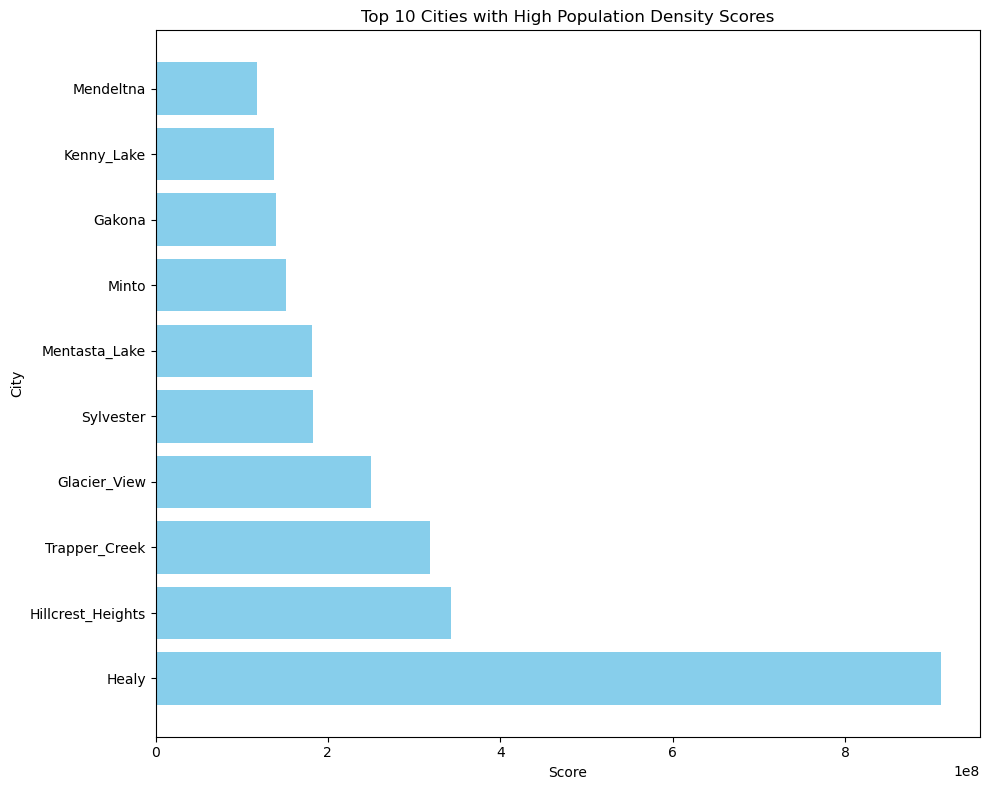

In [40]:
# Plotting a horizontal bar chart for the top 10 cities
plt.figure(figsize=(10, 8))
plt.barh(top_10_cities['city'], top_10_cities['Score'], color='skyblue')
plt.title('Top 10 Cities with High Population Density Scores')
plt.xlabel('Score')
plt.ylabel('City')
plt.tight_layout()
plt.savefig('top_10_city_scores_bar_chart.png')
plt.show()


In [25]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [32]:
import folium
from IPython.display import display

# Data visualization with Folium
map_center = [37.7749, -122.4194]  # San Francisco coordinates
map_obj2 = folium.Map(location=map_center, zoom_start=4)

# Mark valid points on the map
for index, row in valid_points.iterrows():
    folium.Marker([row['latitude'], row['longitude']],
                  popup=f"City: {row['NearestCity']}\nAirport: {row['NearestAirport']}").add_to(map_obj2)

# Save the map as an HTML file
map_obj2.save("Citys_with t.html")

In [33]:
display(map_obj2)